In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
import math
from sklearn.metrics import mean_squared_error ,r2_score
import datetime
from sklearn.preprocessing import StandardScaler
import warnings


In [2]:
warnings.filterwarnings('ignore')


In [3]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
test_data = test

In [7]:
train.shape

(1460, 81)

In [8]:
 test.shape

(1459, 80)

In [9]:
train.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [10]:
train.isnull().sum().sort_values(ascending=False)


PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

## note: a lot of empty in MiscFeature, PoolQC,Fence,Alley

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

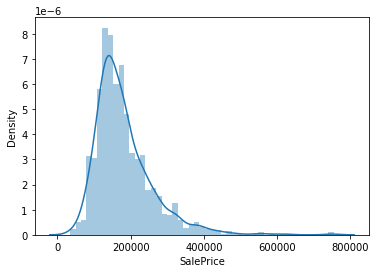

In [11]:
sns.distplot(train['SalePrice'])

In [12]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

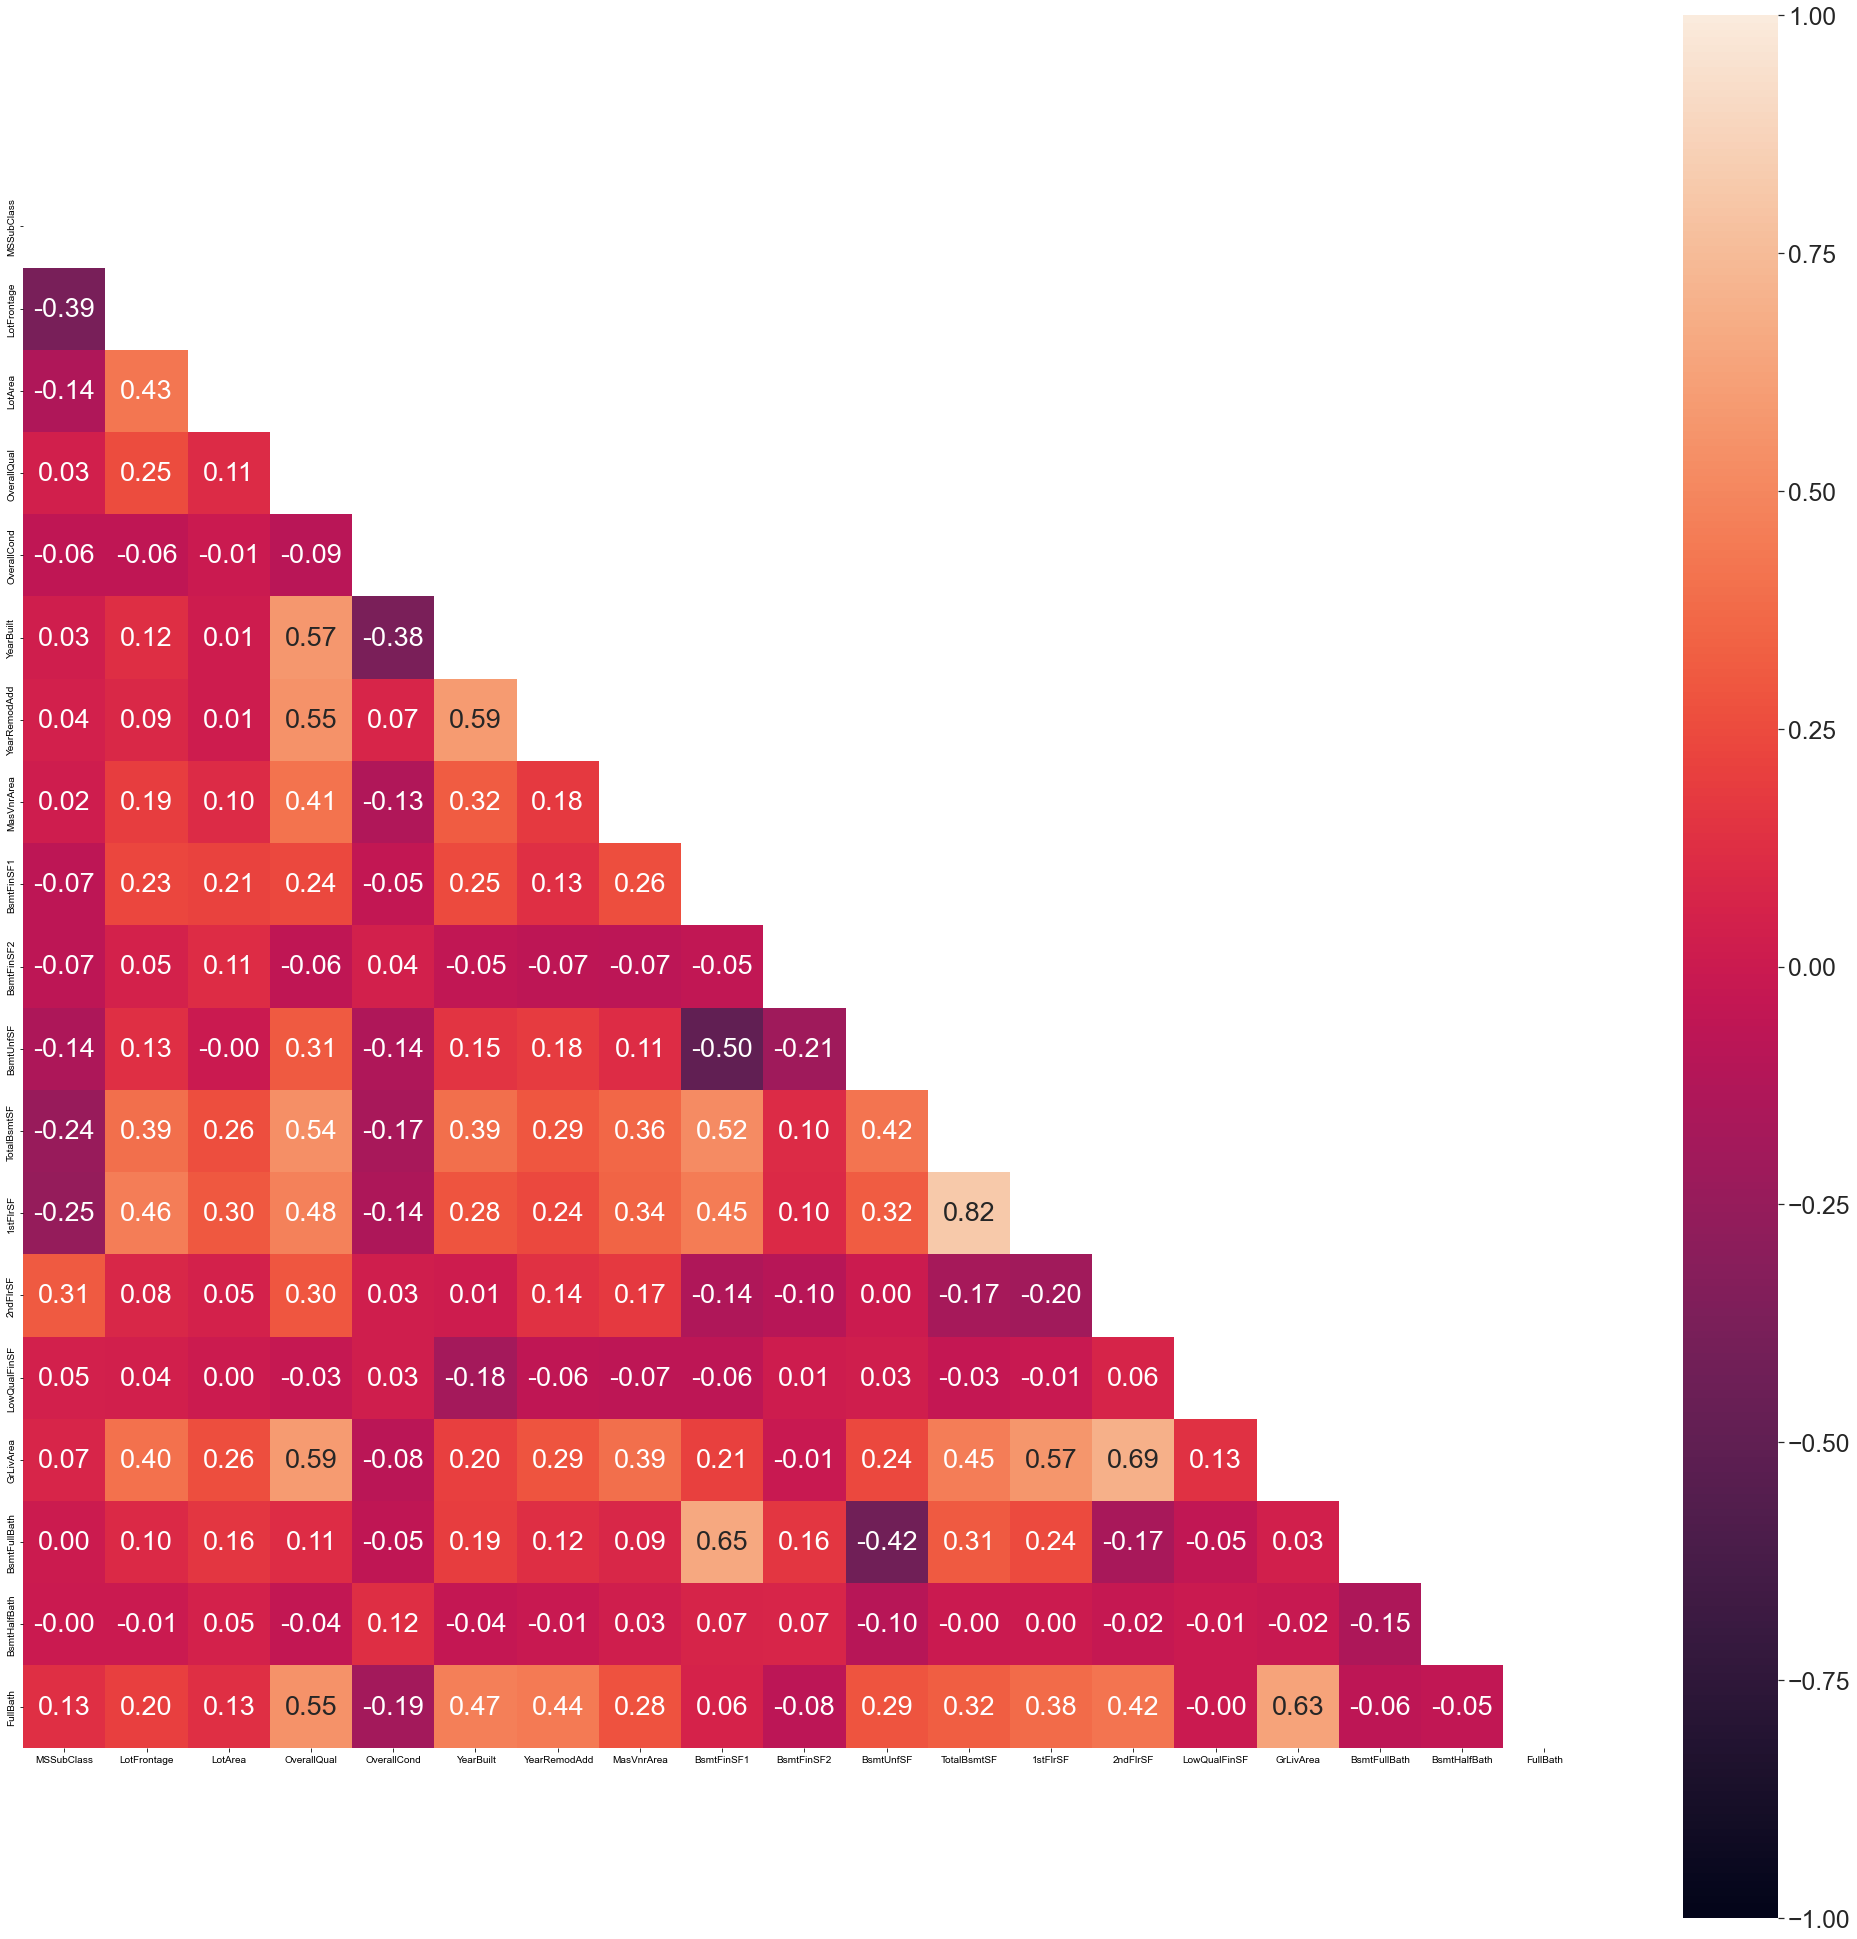

In [13]:
corrmat = train.iloc[:,1:50:].corr()
fig, ax = plt.subplots(figsize=(35,35))        
sns.set(font_scale=2.25)
sns.heatmap(corrmat,  square=True,fmt='.2f',cbar=True, annot=True, vmin = -1, vmax = +1,mask =  np.triu(train.iloc[:,1:50:].corr()));

<AxesSubplot:>

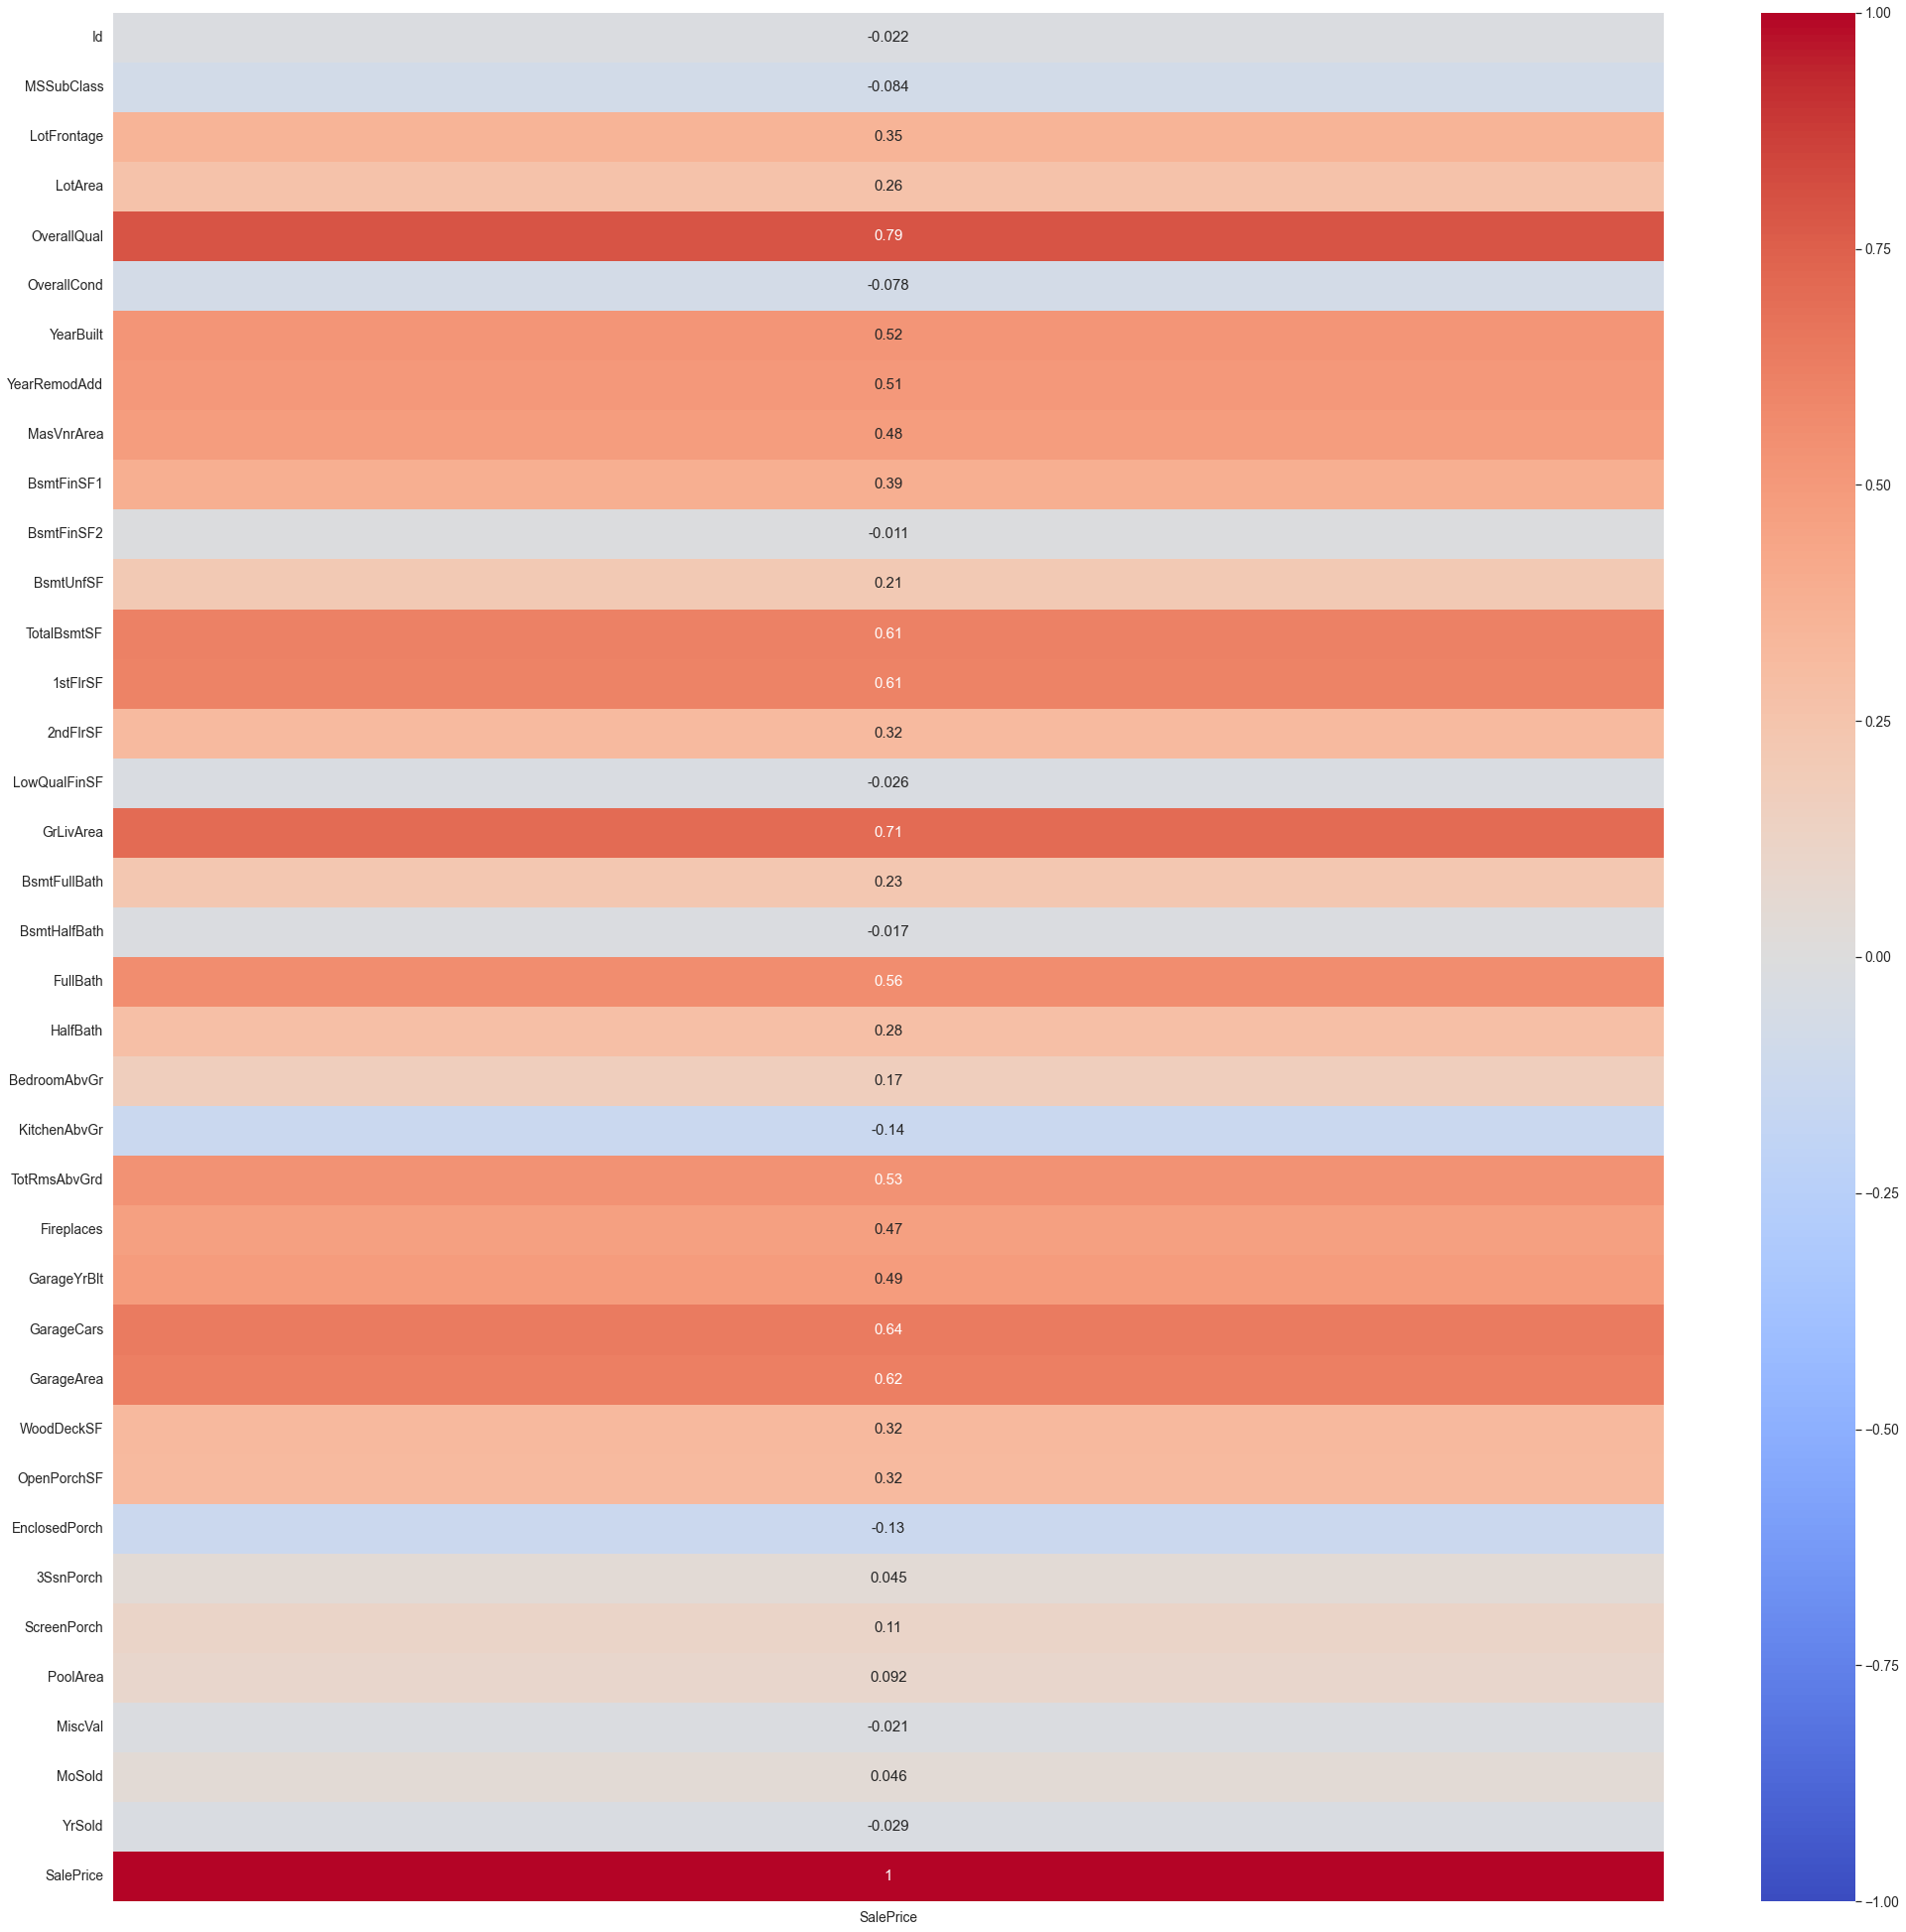

In [14]:
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(35,35))        

sns.heatmap(train.corr()[['SalePrice']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

## note : the strongest correlation OveralQual, GRLiveArea

## todo: learn more abot heatmap


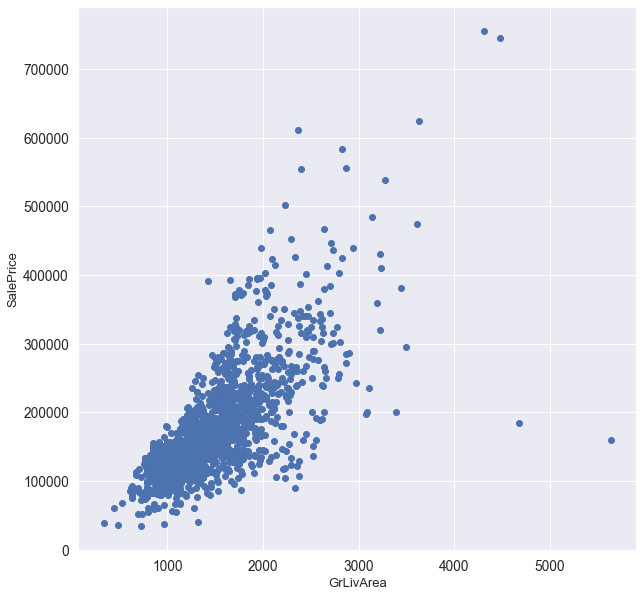

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## not normalize too many vibros

In [16]:
train['SalePriceNormilize'] = preprocessing.normalize([np.array(train['SalePrice'])]).T
train['SalePriceNormilize']


0       0.027617
1       0.024041
2       0.029604
3       0.018544
4       0.033114
          ...   
1455    0.023180
1456    0.027816
1457    0.035300
1458    0.018825
1459    0.019537
Name: SalePriceNormilize, Length: 1460, dtype: float64

In [17]:
train['GrLivAreaNormilize'] = preprocessing.normalize([np.array(train['GrLivArea'])]).T
train['GrLivAreaNormilize']

0       0.027902
1       0.020592
2       0.029142
3       0.028016
4       0.035865
          ...   
1455    0.026874
1456    0.033825
1457    0.038182
1458    0.017590
1459    0.020494
Name: GrLivAreaNormilize, Length: 1460, dtype: float64

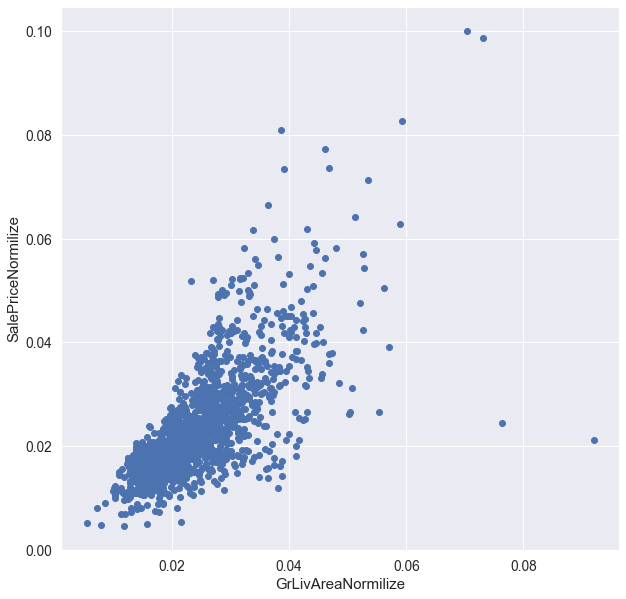

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x = train['GrLivAreaNormilize'], y = train['SalePriceNormilize'])
plt.ylabel('SalePriceNormilize')
plt.xlabel('GrLivAreaNormilize')
plt.show()

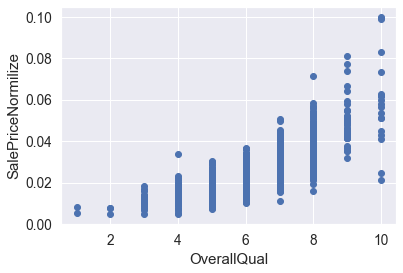

In [19]:
fig, ax = plt.subplots()
ax.scatter(x = train['OverallQual'], y = train['SalePriceNormilize'])
plt.ylabel('SalePriceNormilize')
plt.xlabel('OverallQual')
plt.show()

## delete emissions

In [20]:
train = train.drop(train[(train['GrLivAreaNormilize'] > 0.04)].index)

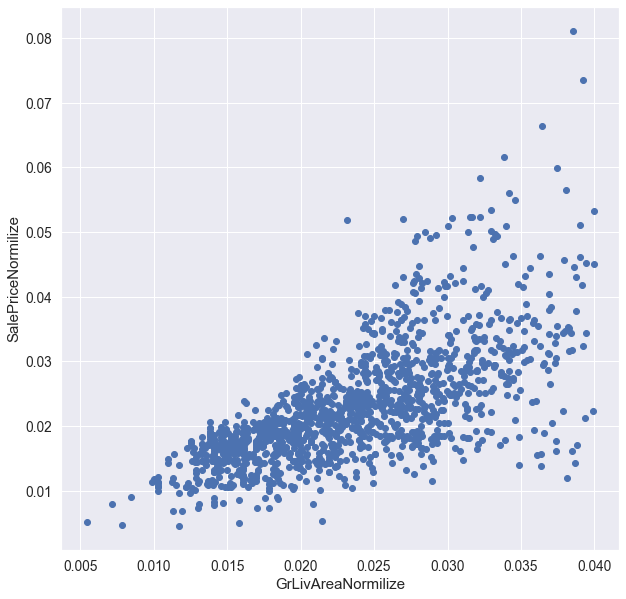

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x = train['GrLivAreaNormilize'], y = train['SalePriceNormilize'])
plt.ylabel('SalePriceNormilize')
plt.xlabel('GrLivAreaNormilize')
plt.show()

In [22]:
train = train.drop(columns=['SalePriceNormilize','GrLivAreaNormilize'], axis=1)



train.shape

(1383, 81)

In [23]:
test.shape

(1459, 80)

In [24]:
train.dropna(axis=0, subset=['SalePrice'], inplace=True)
train = train.drop(columns=['Id'], axis=1)
test = test.drop(columns=['Id'], axis=1)

In [25]:
train.isnull().sum().sort_values(ascending=False)

PoolQC         1380
MiscFeature    1332
Alley          1297
Fence          1115
FireplaceQu     684
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [26]:
train = train.drop("PoolQC", axis='columns')
train = train.drop("MiscFeature", axis='columns')

In [27]:
[train.shape, test.shape]

[(1383, 78), (1459, 79)]

In [28]:
num_feature = []  
values = {}
for column in train.columns:
    if train[column].dtype in ['int64', 'float64']:
        num_feature.append(column)    
        values[column] = train[column].median()
        
train.fillna(value=values, inplace=True)        
num_feature_test  = [] 
values_test = {}
for column in test.columns:
    if test[column].dtype in ['int64', 'float64']:
        num_feature.append(column)   
        values_test[column] = test[column].median()
test.fillna(value=values, inplace=True)        


In [29]:
train.isnull().sum().sort_values(ascending=False)

Alley          1297
Fence          1115
FireplaceQu     684
GarageCond       79
GarageType       79
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
MSZoning          0
SalePrice         0
Length: 78, dtype: int64

In [30]:
# scaler = StandardScaler()
# train = scaler.fit_transform(train)
# train = pd.DataFrame(train)

# test = scaler.transform(test)
# test = pd.DataFrame(test)

In [31]:
y = train['SalePrice']


In [32]:
[train.shape, test.shape]

[(1383, 78), (1459, 79)]

In [33]:
all_data = pd.concat([train.iloc[:,:-1], test],axis=0)
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PoolQC,MiscFeature
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,2,2008,WD,Normal,NaN,NaN
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,0,5,2007,WD,Normal,NaN,NaN
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,0,9,2008,WD,Normal,NaN,NaN
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,0,2,2006,WD,Abnorml,NaN,NaN
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,0,12,2008,WD,Normal,NaN,NaN


## processing categorical features



In [34]:
categ_feature = []
# categ_feature_test = []

for column in all_data.columns:
    if all_data[column].dtype == "object":
        categ_feature.append(column)
# for column in test.columns:
#     if test[column].dtype == "object":
#         categ_feature_test.append(column) 
       
# categ_feature == categ_feature_test


In [35]:
# train = pd.get_dummies(train, columns=categ_feature)

In [36]:
# test = pd.get_dummies(test, columns=categ_feature_test)

In [37]:
all_data = pd.get_dummies(all_data, columns=categ_feature)

In [38]:
train = all_data.iloc[:1383, :]
test = all_data.iloc[1383:, :]

In [39]:
[train.shape, test.shape, all_data.shape ]

[(1383, 284), (1459, 284), (2842, 284)]

In [40]:
train.isnull().sum().sort_values(ascending=False)

MSSubClass          0
BsmtCond_TA         0
BsmtFinType1_BLQ    0
BsmtFinType1_ALQ    0
BsmtExposure_No     0
                   ..
Condition2_PosA     0
Condition2_PosN     0
Condition2_RRAn     0
Condition2_RRNn     0
MiscFeature_Shed    0
Length: 284, dtype: int64

In [41]:
train.shape

(1383, 284)

In [42]:
test.shape

(1459, 284)

In [43]:
X = train.copy()


In [44]:
# y = pd.DataFrame(y)
# y, y.columns

In [48]:
# start_time = datetime.datetime.now()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# # clf = LogisticRegression(random_state=42, penalty = 'l2')

# grid={"C":[ 0.01, 0.05, 0.1, 0.5, 1.0, 10.0]}
# stat = {}
# for c in [ 0.01, 0.05, 0.1, 0.5, 1.0, 10.0]:
#     logreg=LogisticRegression(random_state=42, max_iter = 200, C=c)
#     logreg.fit(X_train, y_train)
#     y_predict = logreg.predict(X_test)
#     stat[c] = r2_score(y_test,y_predict)
# #     print("score",r2_score(y_test,y_predict))

# print(stat)
# cc = np.linspace(1,10,10)
# grid={"C":cc}
# stat = {}
# for c in range(len(cc)):
#     logreg=LogisticRegression(random_state=42, max_iter = 200, C=cc[c])
#     logreg.fit(X_train, y_train)
#     y_predict = logreg.predict(X_test)
#     stat[cc[c]] = r2_score(y_test,y_predict)
# #     print("score",r2_score(y_test,y_predict))

# print(stat)




## max score 0.4 I gave up , decided to try another algorithm

In [54]:
model=LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2_score(y_test,y_predict)

0.896257350319578

### score is 0.896257350319578 I am happy

In [58]:
MSE = np.square(np.subtract(y_test,y_predict)).mean() 

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

23228.879307516545


In [61]:
MSE = mean_squared_error(y_test,y_predict)

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

23228.879307516545


In [62]:
r2_score(y_test, y_predict)

0.896257350319578

In [63]:
y = model.predict(test)

In [64]:
submission = {
    'Id': test_data.Id.values,
    'SalePrice': y
}
solution = pd.DataFrame(submission)
solution.to_csv('submissionNew.csv',index=False)